# Advanced operations

:::{warning}
This chapter is still an early draft and is likely to significantly change in the near future. 
:::

This chapter will give an overview of more advanced operations you can perform on medical images with the nitrain-image package. Such operations fundamentally change either the intensity or the spatial layout the image to such a degree that it is perceived differently.

These operations are typically useful for pre-processing images so that the eventual model is easier to train and more effective. And in later chapters, you'll see more about how randomness can be injected into these operations to perform data augmentation to improve model training even more.

Let's start again by loading some images that will be used to demonstrate advanced operations with nitrain-image.

In [1]:
import ntimage as nti
img2d = nti.example('r16')
img3d = nti.example('mni')

## Intensity operations

Intensity operations alter the underlying values of the image but generally leave the spatial representation in tact. The following operations belong to this category:

- std_normalize
- normalize
- smooth
- clamp
- threshold

The normalizing functions help you make sure your images have a mean of zero and standard deviation of one or are between a given min and max value.

In [3]:
print(f'Current mean-std: {img2d.mean()} - {img2d.std()}')
img2d_std = img2d.std_normalize()
print(f'New mean-std: {img2d_std.mean()} - {img2d_std.std()}')

Current mean-std: 50.46136474609375 - 84.8173074888088
New mean-std: -8.195638656616211e-08 - 1.0


The `std_normalize` function also lets you supply a reference mean and std so you can normalize the image based on the group-level mean and std. The `normalize` function, on the other hand, will put your images within a supplied range.

In [4]:
print(f'Current min-max: {img2d.min()} - {img2d.max()}')
img2d_std = img2d.normalize(0, 2)
print(f'New mean-std: {img2d_std.min()} - {img2d_std.max()}')

Current min-max: 0 - 254
New mean-std: 0.0 - 2.0


The next set of functions are useful for dealing with outliers and extreme values. The `clamp` function will set any value below the user-supplied min to the min and any value above the user-supplied max to the max. 

In [2]:
print(f'Current min-max: {img2d.min()} - {img2d.max()}')
img2d_new = img2d.clamp(10, 200)
print(f'New mean-std: {img2d_new.min()} - {img2d_new.max()}')

print(f'Old vs new non-zero pixels: {nti.sum(img2d>0)} - {nti.sum(img2d_new>0)}')

Current min-max: 0 - 254
New mean-std: 0 - 200
Old vs new non-zero pixels: 19278 - 19278


The `threshold` function, on the other hand, has a similar setup but will set any values below the min to zero and any values above the max to zero.

In [3]:
print(f'Current min-max: {img2d.min()} - {img2d.max()}')
img2d_new = img2d.threshold(10, 200)
print(f'New mean-std: {img2d_new.min()} - {img2d_new.max()}')

print(f'Old vs new non-zero pixels: {nti.sum(img2d>0)} - {nti.sum(img2d_new>0)}')

Current min-max: 0 - 254
New mean-std: 0 - 254
Old vs new non-zero pixels: 19278 - 7399


Notice how the `clamp` function did not change the number of non-zero pixels while the `threshold` function decreased the number of non-zero pixels. That's because `clamp` only changes pixel values to be at the clamp min / max, while `threshold` sets values outside of the threshold min / max to zero.

Additionally, there is the `smooth` function which lets you slightly blur your images using a gaussian filter. To understand this function, we have to plot the before and after. Later on, you'll get a full introduction to the great capabilities for visualizing images that nitrain-image provides.

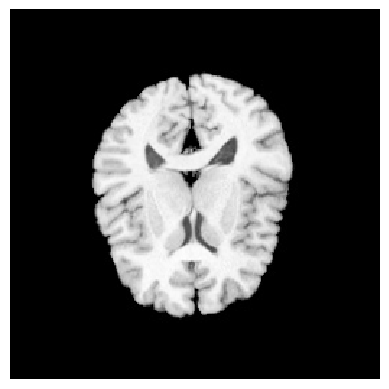

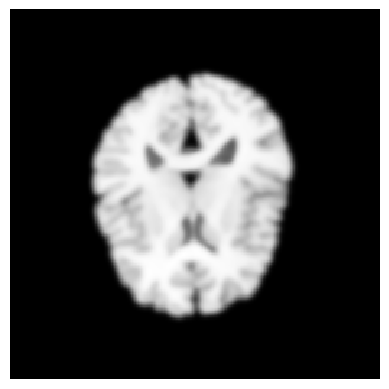

In [4]:
img2d_smooth = img2d.smooth(2)
img2d.plot()
img2d_smooth.plot()